<a href="https://colab.research.google.com/github/SebaCarrilloS/Formacion-Data-Science/blob/main/Ejercicio-Ramen-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafío 3 - Aprendizaje supervisado y no supervisado (Parte II)**

Nombre: Sebastián Carrillo

Curso: Machine Learning (G80)

# **Descripción**
En este proyecto de Machine Learning, se te ha encomendado la tarea de construir un modelo de clasificación que determine si un paquete de ramen es "bueno" o "malo" basándose en sus características específicas. Para ello, se proporciona un conjunto de datos que contiene información sobre diferentes marcas de ramen y sus atributos, así como una etiqueta que indica si el ramen fue considerado como "bueno" o "malo" por expertos o usuarios.


Para cumplir este objetivo necesitarás:


## 1. Realizar un análisis exhaustivo de calidad de datos para identificar y tratar posibles valores faltantes, valores atípicos y errores en los datos. Garantizar que el conjunto de datos esté limpio y preparado para su posterior procesamiento y entrenamiento de los modelos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Formación Data Science/Desafío Latam/Módulo 5 - Machine Learning/Desafios/Desafio 4/ramen-ratings.xlsx")

In [ ]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [ ]:
df.isna().sum()

,0
Review #,0
Brand,0
Variety,0
Style,2
Country,0
Stars,0
Top Ten,2539


In [ ]:
df["Style"].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar', nan],
      dtype=object)

In [ ]:
df['Style']=df['Style'].fillna('None')


## 2. Realizar el preprocesamiento de los datos, incluyendo la normalización o estandarización de las características, codificación de variables categóricas y división del conjunto de datos en conjuntos de entrenamiento y prueba.


In [ ]:
df.loc[(df['Top Ten'].notna()), 'Top_Ten'] = 1
df.loc[(df['Top Ten'].isna()), 'Top_Ten'] = 0
df['Top_Ten'].value_counts()

,count
Top_Ten,
0.0,2539
1.0,41


In [ ]:
df.loc[df['Stars'] == 'Unrated', 'Stars'] = '0'
df['Stars'] = pd.to_numeric(df['Stars'])
df['Stars'].describe()

,Stars
count,2580.000000
mean,3.650426
std,1.022358
min,0.000000
25%,3.250000
50%,3.750000
75%,4.250000
max,5.000000


In [ ]:
estrellas= pd.cut(df['Stars'],bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
estrellas.value_counts(normalize=True)

,proportion
Stars,
"(3.5, 4.0]",0.293610
"(3.0, 3.5]",0.200314
"(4.5, 5.0]",0.176401
"(4.0, 4.5]",0.111329
"(2.5, 3.0]",0.104273
"(1.5, 2.0]",0.037632
"(2.0, 2.5]",0.036064
"(1.0, 1.5]",0.019208
"(0.5, 1.0]",0.010976


Text(0.5, 1.0, 'Distribution of Ramen Ratings')

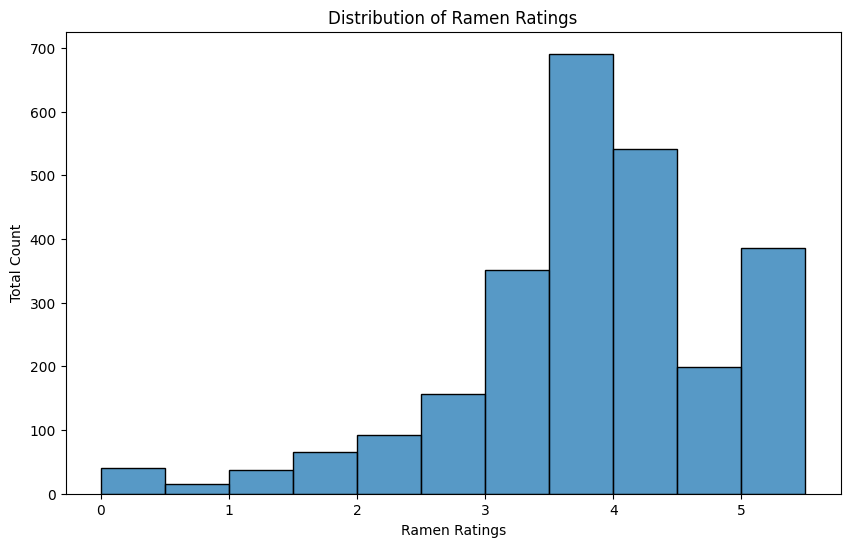

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Stars'], bins=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
plt.xlabel('Ramen Ratings')
plt.ylabel('Total Count')
plt.title('Distribution of Ramen Ratings')

In [ ]:
## Criterio propuesto para determinar si es bueno o malo el ramen.

df['Bueno/Malo'] = [1 if x >= 3.5 else 0 for x in df['Stars']]

In [ ]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,Top_Ten,Bueno/Malo
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,0.0,1
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN,0.0,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN,0.0,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,0.0,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,0.0,1


In [ ]:
df['Style'].value_counts(normalize=True)

,proportion
Style,
Pack,0.593411
Bowl,0.186434
Cup,0.174419
Tray,0.041860
Box,0.002326
None,0.000775
Can,0.000388
Bar,0.000388


In [ ]:
brand_counts = df['Brand'].value_counts()
threshold = 20  # Número mínimo de apariciones para no ser agrupado en 'Other'
df['Brand'] = df['Brand'].apply(lambda x: x if brand_counts[x] >= threshold else 'Other')


In [ ]:
df["Brand"].unique()

array(['Other', 'Nissin', 'Samyang Foods', 'KOKA', 'Nongshim', 'Paldo',
       'MyKuali', 'Ottogi', 'Maruchan', 'Maggi', 'Indomie', 'Myojo',
       'Master Kong', 'Ve Wong', 'Wai Wai', 'Vifon', 'Sapporo Ichiban',
       'MAMA', 'JML', 'A-Sha Dry Noodle', 'Mamee', 'Mama', 'Vina Acecook',
       'Lucky Me!'], dtype=object)

In [ ]:
df=df.drop(columns=["Top Ten","Variety"], axis=1)
df = pd.get_dummies(df, columns=['Brand', 'Country', 'Style'], drop_first=True)

## 3. Dividir los datos en conjuntos de entrenamiento y prueba y entrenar dos modelos de clasificación: uno utilizando Regresión Logística y otro utilizando Support Vector Machine (SVM). Estos modelos servirán para determinar si un paquete de ramen es "bueno" o "malo" en función de las características proporcionadas y realiza una búsqueda de hiperparámetros.

In [ ]:
X=df.drop("Bueno/Malo", axis=1)
y=df["Bueno/Malo"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions_log = logreg.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
    'class_weight': [None, 'balanced']
}


svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'], 'kernel': ['rbf']})

In [ ]:
predictions_svm = grid_search.predict(X_test)

## 4. Evaluar el rendimiento de ambos modelos utilizando métricas relevantes para problemas de clasificación, como precisión, recall, F1-score y el área bajo la curva ROC (AUC-ROC). A partir de esto, debes comparar y analizar los resultados obtenidos por cada modelo para determinar cuál es más adecuado para este problema específico.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, RocCurveDisplay

In [ ]:
confusion_matrix(y_test,predictions_log)

array([[128,   3],
       [  1, 384]])

In [ ]:
print("Regresión Logística:")
print(classification_report(y_test, predictions_log))
print("AUC-ROC:", roc_auc_score(y_test, predictions_log))

Regresión Logística:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       131
           1       0.99      1.00      0.99       385

    accuracy                           0.99       516
   macro avg       0.99      0.99      0.99       516
weighted avg       0.99      0.99      0.99       516

AUC-ROC: 0.9872509170219094


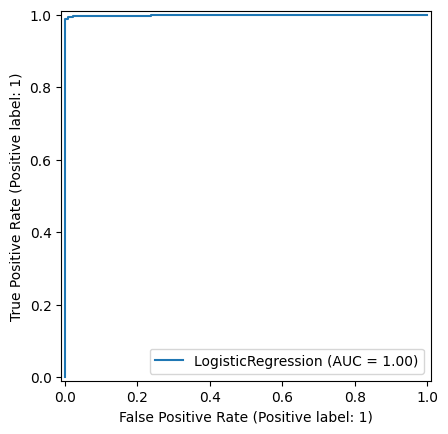

In [ ]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [ ]:
print("Support Vector Machine:")
print(classification_report(y_test, predictions_svm,zero_division=0))
print("AUC-ROC:", roc_auc_score(y_test, predictions_svm))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       131
           1       0.99      0.99      0.99       385

    accuracy                           0.99       516
   macro avg       0.98      0.98      0.98       516
weighted avg       0.99      0.99      0.99       516

AUC-ROC: 0.9833548131258054


In [ ]:
confusion_matrix(y_test,predictions_svm)

array([[128,   3],
       [  4, 381]])

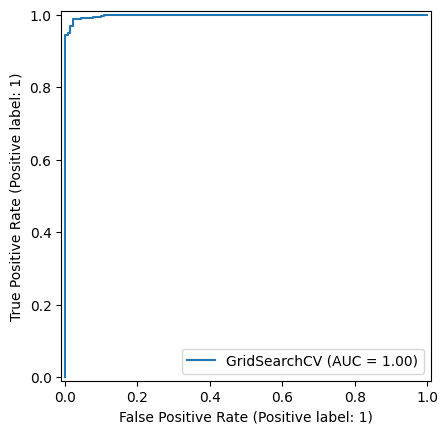

In [ ]:
RocCurveDisplay.from_estimator(grid_search, X_test, y_test)

# Conclusiones:

*  Ambos modelos están funcionando muy bien con los datos que se proporcionaron, y esto se puede ver tanto en el accuracy como en el recall que poseen los dos, la cual es casi 100%.
*  También se puede ver que el AUC-ROC son muy cercanos al valor 1, donde ambos modelos poseen una excelente capacidad de discriminación para ambas clases, siendo la diferencia marginal entre ambos modelos.
*  El modelo logístico para este caso es ligeramente superior debido a tener un mejor recall que el modelo de SVM, sin embargo, la diferencia no es tan significativa como podría ser con otros modelos.
*  Una posible mejora sería ajustar aún más el Grid Search que se planteó para el modelo de SVM, aunque los resultados tampoco mejorarían mucho el modelo debido a los valores obtenidos en el reporte de clasificación.